In [ ]:
import pandas as pd 
from nltk.corpus import stopwords
import nltk
from textblob import Word
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from gensim.models import LsiModel
from pprint import pprint
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def clean_data(data, senti):

  data['Clean Tweet'] = data['Clean Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
  data['Clean Tweet'] = data['Clean Tweet'].str.replace('[^\w\s]','')
  stop = stopwords.words('english')
  
  data['Clean Tweet'] = data['Clean Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  freq_words = pd.Series(' '.join(data['Clean Tweet']).split()).value_counts()[:10]
  freq_words = list(freq_words.index)
  data['Clean Tweet'] = data['Clean Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_words))
  data['Clean Tweet'] = data['Clean Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  data['Clean Tweet'] = data['Clean Tweet'].apply(lambda x: nltk.word_tokenize(x))
  Token_words = data['Clean Tweet'].to_list()
  id2word = corpora.Dictionary(Token_words)
  corpus = [id2word.doc2bow(title) for title in Token_words]
  return corpus, id2word,Token_words
 
data = pd.read_csv('Sentimentalized Tweets.csv')
df_positive = data[data['Predicted Sentiment'] == 'Positive'] 
df_negitive = data[data['Predicted Sentiment'] == 'Negative'] 
df_neutral = data[data['Predicted Sentiment'] == 'Neutral'] 
corpus_positive, id2word_positive, Token_words_positive = clean_data(df_positive,'Positive')
corpus_negitive, id2word_negitive, Token_words_negitive = clean_data(df_negitive,'Negative')
corpus_neutral, id2word_neutral, Token_words_neutral = clean_data(df_neutral,'Neutral')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
def modeling_init(corpus,id2word,Token_words,senti):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=2)
  print('The topics using LDA Model are:')
  pprint(lda_model.print_topics())
  print('Perplexity:', senti,lda_model.log_perplexity(corpus))
  coherence_model_lda = CoherenceModel(model=lda_model, texts=Token_words, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('Coherence Score:',senti,coherence_lda)
modeling_init(corpus_positive, id2word_positive, Token_words_positive,"Positive")
modeling_init(corpus_negitive, id2word_negitive, Token_words_negitive,"Negative")
modeling_init(corpus_neutral, id2word_neutral, Token_words_neutral,"Neutral")

The topics using LDA Model are:
[(0,
  '0.017*"वकसन" + 0.015*"ह" + 0.009*"स" + 0.009*"न" + 0.007*"पर" + '
  '0.007*"covid" + 0.007*"india" + 0.006*"टरयल" + 0.006*"भरत" + 0.006*"great"'),
 (1,
  '0.006*"coronavirusupdates" + 0.006*"india" + 0.006*"covid" + '
  '0.006*"coronaviruspandemic" + 0.005*"covid_19" + 0.005*"coronavirusindia" + '
  '0.004*"கரன" + 0.004*"covid__19" + 0.004*"தடபபச" + 0.003*"health"')]
Perplexity: Positive -8.816446827636321
Coherence Score: Positive 0.40047464567149504
The topics using LDA Model are:
[(0,
  '0.007*"astrazeneca" + 0.006*"covid" + 0.006*"people" + 0.005*"u" + '
  '0.005*"amp" + 0.005*"get" + 0.005*"said" + 0.005*"say" + 0.005*"trump" + '
  '0.004*"news"'),
 (1,
  '0.009*"म" + 0.008*"वकसन" + 0.007*"கரன" + 0.007*"tweet" + 0.006*"करन" + '
  '0.006*"russia" + 0.005*"न" + 0.005*"ह" + 0.004*"news" + 0.004*"தடபபச"')]
Perplexity: Negative -8.802022209322546
Coherence Score: Negative 0.3072253214811722
The topics using LDA Model are:
[(0,
  '0.009*"like" + 0

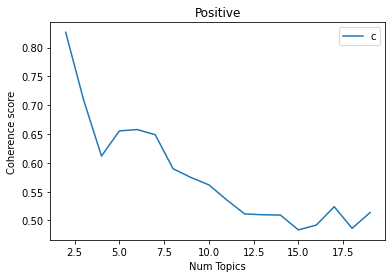

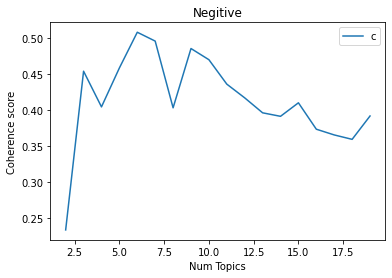

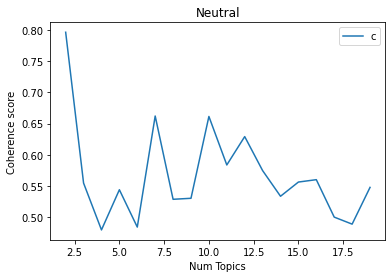

In [ ]:

def compute_lsa(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

lsa_model_list_positive, lsa_coherence_values_pos = compute_lsa(dictionary=id2word_positive, corpus=corpus_positive, texts=Token_words_positive, start=2, limit=20, step=1)
lsa_model_list_negitive, lsa_coherence_values_neg = compute_lsa(dictionary=id2word_negitive, corpus=corpus_negitive, texts=Token_words_negitive, start=2, limit=20, step=1)
lsa_model_list_neutral, lsa_coherence_values_neut = compute_lsa(dictionary=id2word_neutral, corpus=corpus_neutral, texts=Token_words_neutral, start=2, limit=20, step=1)

def plotiing(lsa_coherence_values,senti):
  start=2; limit=20; step=1;
  x = range(start, limit, step)
  plt.plot(x, lsa_coherence_values)
  plt.xlabel("Num Topics")
  plt.ylabel("Coherence score")
  plt.legend(("coherence_values"), loc='best')
  plt.title(senti)
  plt.show()

plotiing(lsa_coherence_values_pos,"Positive")
plotiing(lsa_coherence_values_neg,"Negitive")
plotiing(lsa_coherence_values_neut, "Neutral")

In [ ]:
def modling_resul(corpus,id2word,Token_words,senti):
  lsamodel = LsiModel(corpus=corpus, id2word=id2word, num_topics=2)
  print('The topics using LSA Model are:',senti)
  pprint(lsamodel.print_topics())
  coherence_model_lsa = CoherenceModel(model=lsamodel, texts=Token_words, dictionary=id2word, coherence='c_v')
  coherence_lsa = coherence_model_lsa.get_coherence()
  print('Coherence Score:',senti, coherence_lsa)
modling_resul(corpus_positive, id2word_positive, Token_words_positive,"Positive")
modling_resul(corpus_negitive, id2word_negitive, Token_words_negitive,"Negative")
modling_resul(corpus_neutral, id2word_neutral, Token_words_neutral,"Neutral")

The topics using LSA Model are: Positive
[(0,
  '0.371*"tinnitus" + 0.217*"amp" + 0.203*"great" + 0.197*"day" + '
  '0.197*"people" + 0.190*"result" + 0.190*"100" + 0.189*"back" + '
  '0.187*"others" + 0.187*"hear"'),
 (1,
  '0.634*"ह" + 0.422*"वकसन" + 0.241*"स" + 0.230*"न" + 0.193*"पर" + 0.142*"रह" '
  '+ 0.137*"टरयल" + 0.136*"भरत" + 0.109*"और" + 0.101*"कय"')]
Coherence Score: Positive 0.8264575986855129
The topics using LSA Model are: Negative
[(0,
  '0.322*"astrazeneca" + 0.296*"covid" + 0.266*"amp" + 0.172*"get" + 0.169*"u" '
  '+ 0.167*"say" + 0.166*"people" + 0.153*"trump" + 0.142*"oxford" + '
  '0.141*"news"'),
 (1,
  '-0.299*"market" + -0.293*"treatment" + -0.292*"phase3" + -0.292*"rate" + '
  '-0.286*"survival" + -0.286*"nurown" + -0.195*"covid" + -0.189*"ema_news" + '
  '-0.155*"do" + -0.150*"2"')]
Coherence Score: Negative 0.23292345976154133
The topics using LSA Model are: Neutral
[(0,
  '0.271*"vaccination" + 0.255*"safe" + 0.251*"america" + 0.248*"public" + '
  '0.239*"hy